In [70]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

%load_ext autoreload
%autoreload 2

from appearance_bias.feature_extraction import FeatureExtractor, LabelLoader
from appearance_bias.model import Regressor
import os
import pickle
import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
%cd /Users/steed/caliskan/git/caliskan-image-bias/caliskan-retraining-inception

/Users/steed/caliskan/git/caliskan-image-bias/caliskan-retraining-inception


In [72]:
image_dir = "data/maxdistinct"
test_dir = "data/random"
label = "Trustworthy"

In [73]:
# get face embeddings for all the training data
features_train = FeatureExtractor(image_dir).get_features()
features_train_aligned = FeatureExtractor('{}_aligned'.format(image_dir)).get_features()
print(features_train.shape)
print(features_train_aligned.shape)

(13125, 130)
(13125, 130)


In [14]:
# export to TSV for UMAP, TSNE
for trait in ["Trustworthy", "Likeable", "Competent", "Extroverted", "Attractive", "Dominant", "all"]:
    features_trait = features_train_aligned[
        features_train_aligned["Source"] == "25MaxDistinct_{}-FineGrain".format(trait)
    ] if trait != "all" else features_train_aligned
    features = features_trait.loc[:, range(2,130)]
    meta = features_trait.loc[:, "Face name"]
    features.to_csv("output/features/features_{}.tsv".format(trait), sep="\t", header=False)
    meta.to_csv("output/features/meta_{}.tsv".format(trait), sep="\t", header=True)

In [15]:
features

,2,3,4,5,6,7,8,9,10,11,...,120,121,122,123,124,125,126,127,128,129
0,0.048694,-0.390944,-2.244966,1.022856,-0.209081,-0.674991,0.409483,-1.452234,-0.427465,0.256640,...,1.390532,0.090295,1.188529,-0.136220,1.245038,-0.249736,-0.294197,-1.579086,0.539102,-1.808387
1,-0.890641,-1.606654,-1.420017,0.952581,1.434826,-1.758222,-0.345504,-1.148759,0.921016,-1.855385,...,0.000045,1.139906,0.735734,-0.250533,-0.166246,-0.435355,-0.752365,-0.277353,-0.245210,0.625526
2,-0.690573,-0.576943,-1.329103,0.006544,2.128360,-1.959849,0.984097,-2.247301,0.145223,-1.559443,...,0.212909,2.260542,1.014522,0.710367,0.997533,-0.692450,-1.506665,-1.223432,-0.270594,-0.087717
3,-1.511578,-1.327390,-0.130453,-0.671067,-0.009634,-0.021833,-1.002791,-1.159268,0.991752,-2.188404,...,0.928042,0.751925,0.491605,0.125481,2.459817,-1.981282,0.319000,-0.901317,1.348657,-0.610905
4,-0.554482,-1.057734,-1.516527,0.446714,0.996501,-1.143007,0.595606,-2.186642,0.079469,-0.747549,...,0.694656,1.128079,0.495504,-0.248505,1.859594,-0.677621,0.268413,-0.948511,1.619764,-1.213411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13120,-1.121135,-0.458859,-0.652499,1.105912,0.654693,-0.135747,-0.433184,0.225658,-0.936771,-1.372324,...,-0.197747,-0.920236,-0.062899,-0.167897,1.544908,-1.127662,-0.676269,0.371936,1.345261,-0.981193
13121,-0.183567,0.243871,-1.277847,0.054942,0.820147,-1.288079,-1.110074,-1.089539,-0.978924,0.138217,...,-1.015865,-0.521079,-0.160595,-0.768499,1.324307,-1.207439,-1.684744,-0.357238,0.672012,-1.235850
13122,-1.084055,-0.434307,-0.695657,1.141159,0.699064,-0.097911,-0.399049,0.282125,-1.006732,-1.309568,...,-0.135714,-0.974439,-0.165496,-0.202847,1.551036,-1.072235,-0.673533,0.277771,1.347217,-0.905986
13123,-0.884100,-0.186032,-0.217397,0.987769,0.761247,-1.036332,0.357278,-1.077801,-0.348591,-1.424950,...,-0.266439,0.420935,-0.319512,0.158056,1.913293,-0.512591,-1.152222,-0.120359,0.575184,-1.269982


In [21]:
labels = LabelLoader(image_dir).get_labels()
labels

,Face name,Likeable,Extroverted,Threatening,Trustworthy,Attractive,Dominant,Competent
0,EastAsian24_Likeable (300 faces)_+150,150.0,NaN,NaN,NaN,NaN,NaN,NaN
1,EastAsian12_Likeable (300 faces)_-175,-175.0,NaN,NaN,NaN,NaN,NaN,NaN
2,EastAsian02_Likeable (300 faces)_-275,-275.0,NaN,NaN,NaN,NaN,NaN,NaN
3,EastAsian03_Likeable (300 faces)_-200,-200.0,NaN,NaN,NaN,NaN,NaN,NaN
4,EastAsian13_Likeable (300 faces)_-100,-100.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
13120,Black01_Competence_-300,NaN,NaN,NaN,NaN,NaN,NaN,-300.0
13121,Black02_Competence_-100,NaN,NaN,NaN,NaN,NaN,NaN,-100.0
13122,Black23_Competence_+125,NaN,NaN,NaN,NaN,NaN,NaN,125.0
13123,Black19_Competence_+200,NaN,NaN,NaN,NaN,NaN,NaN,200.0


## Embedding Importance

First task: which features in the embedding are most influential for a) regression and b) classification?

In [25]:
from appearance_bias.api import Regressor

df = Regressor.merge_x_y(features_train, labels)
df_aligned = Regressor.merge_x_y(features_train_aligned, labels)
df.describe()

,Likeable,Extroverted,Threatening,Trustworthy,Attractive,Dominant,Competent,2,3,4,...,120,121,122,123,124,125,126,127,128,129
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,13125.000000,13125.000000,13125.000000,...,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000
mean,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.903094,0.359057,-0.968057,...,0.509817,2.238834,0.661619,-0.617542,0.891189,-1.070979,-0.833931,-0.460044,-0.504891,-1.123205
std,180.325657,180.325657,180.325657,180.325657,180.325657,180.325657,180.325657,0.587511,0.626096,0.584469,...,0.809529,0.810131,0.523773,0.559783,0.467370,0.411960,0.690907,0.634299,0.468440,0.651359
min,-300.000000,-300.000000,-300.000000,-300.000000,-300.000000,-300.000000,-300.000000,-3.029902,-1.296981,-2.478814,...,-1.818273,-0.464979,-1.269951,-2.347290,-0.786563,-2.303913,-2.541285,-1.952752,-1.910195,-2.624746
25%,-150.000000,-150.000000,-150.000000,-150.000000,-150.000000,-150.000000,-150.000000,-1.329614,-0.082221,-1.354126,...,-0.008920,1.750085,0.372645,-0.948931,0.587312,-1.328959,-1.378922,-0.944905,-0.814387,-1.608486
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.881804,0.326187,-0.986022,...,0.604658,2.403317,0.719694,-0.582568,0.850965,-1.089368,-0.842147,-0.560742,-0.537051,-1.191476
75%,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,-0.447371,0.793088,-0.607118,...,1.101337,2.837594,1.010552,-0.252885,1.164881,-0.787783,-0.306620,-0.001306,-0.199650,-0.669573
max,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,0.812406,2.507388,1.529982,...,2.433150,4.164338,1.949690,1.208267,2.397628,0.303566,0.915426,1.217809,1.523536,0.567782


In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, KFold

reg = Regressor(df, label)
reg.fit(split=False)
reg_aligned = Regressor(df_aligned, label)
reg_aligned.fit(split=False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
def validate_reg(reg, verbose=True):
    score = cross_validate(reg.reg, reg.X, reg.y, cv=kf, scoring=['explained_variance', 'neg_root_mean_squared_error'])
    if verbose:
        print("Explained Variance = {}".format(score['test_explained_variance'].mean()))
        print("-RMSE = {}".format(score['test_neg_root_mean_squared_error'].mean()))
    return score
validate_reg(reg)

Explained Variance = 0.9831951792104382
-RMSE = -23.40925006310322


{'fit_time': array([7.87589312, 8.0123117 , 8.39933181, 8.15011096, 8.05096793,
        7.9869287 , 7.95448995, 8.09568906, 7.92669535, 8.04161286]),
 'score_time': array([0.01152706, 0.01285124, 0.01196527, 0.01230907, 0.01210308,
        0.011796  , 0.01630783, 0.01239777, 0.01117587, 0.01205707]),
 'test_explained_variance': array([0.98308046, 0.98131478, 0.98569786, 0.98231713, 0.98436101,
        0.98006964, 0.98176079, 0.98262528, 0.98506657, 0.98565826]),
 'test_neg_root_mean_squared_error': array([-24.17359509, -25.53501325, -21.40997357, -25.1722061 ,
        -23.30982066, -25.11604085, -24.03073594, -22.84565891,
        -20.41123832, -22.08821794])}

In [28]:
validate_reg(reg_aligned)

Explained Variance = 0.9688289784544638
-RMSE = -31.768297174480256


{'fit_time': array([8.02558684, 7.93877006, 8.17230797, 8.02897716, 8.34855604,
        8.18826818, 7.93949819, 7.96517897, 7.97520995, 7.94669986]),
 'score_time': array([0.01213408, 0.01216483, 0.0122869 , 0.01146698, 0.01575494,
        0.01167798, 0.01152492, 0.01195478, 0.01182103, 0.01179504]),
 'test_explained_variance': array([0.96236268, 0.96964292, 0.97305235, 0.9675706 , 0.97047979,
        0.96073243, 0.97415381, 0.9667613 , 0.96985656, 0.97367736]),
 'test_neg_root_mean_squared_error': array([-36.02245624, -32.57286227, -29.38441452, -34.22463729,
        -31.21443189, -35.00182386, -28.63581136, -31.62441477,
        -29.10920683, -29.8929127 ])}

What do the regression feature importances look like?
> The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [29]:
# importance metrics done for the regressor trained on non-aligned images
reg_imp = pd.DataFrame(reg.reg.feature_importances_).sort_values(0, ascending=False)
reg_imp

,0
47,0.439822
27,0.065793
72,0.051873
101,0.025894
30,0.023985
...,...
89,0.000495
118,0.000471
102,0.000441
23,0.000368


Is it the same for classification?

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import copy
from appearance_bias.interpretation import Interpreter

## Trained on non-aligned data ##

# also tried KNN - no difference
# clf = KNeighborsClassifier(n_neighbors=5)
clf = LogisticRegression(max_iter=1000)
X = reg.X
y = reg.y
# convert y to binary
y = Interpreter.binarize(y)
clf.fit(X, y)
cross_val_score(clf, X, y, cv=kf).mean()

0.9583854818523154

In [31]:
## Trained on aligned data ##
clf_aligned = LogisticRegression(max_iter=1000)
X_al = reg_aligned.X
y_al = reg_aligned.y
y_al = Interpreter.binarize(y_al)
clf_aligned.fit(X_al, y_al)
cross_val_score(clf_aligned, X_al, y_al, cv=kf).mean()

0.9520025031289112

In [32]:
# trying other classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

for clf_other in [
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(max_iter=1000),
    SVC()
]:
    print(clf_other)
    clf_other.fit(X_al, y_al)
    print("Accuracy: {}".format(cross_val_score(clf_other, X_al, y_al, cv=kf).mean()))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy: 0.9562663556718626
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.9520025031289112
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef

Out-of-sample accuracy?
(Trying without normalization in case that's causing a problem - turns out, no difference.)

data/random_aligned
data/random_aligned/labels.csv
         Dataset     Face name  Attractive  Competent  Trustworthy  Dominant  \
0    Original300  f42887_e_000    2.400000   3.500000     3.965517  3.913000   
1    Original300  f42887_e_001    4.485714   5.113636     4.793103  5.087000   
2    Original300  f42887_e_002    4.285714   5.522727     5.413793  6.217400   
3    Original300  f42887_e_003    3.085714   4.636364     4.241379  5.956500   
4    Original300  f42887_e_004    4.285714   5.250000     4.931034  6.956500   
..           ...           ...         ...        ...          ...       ...   
296  Original300  f42887_e_296    2.514286   3.909091     5.137931  3.695700   
297  Original300  f42887_e_297    3.200000   4.909091     5.034483  5.608700   
298  Original300  f42887_e_298    4.228571   5.159091     4.482759  6.000000   
299  Original300  f42887_e_299    3.114286   3.840909     4.000000  3.434800   
300          NaN           NaN    0.198036  -0.027002     0.285443 -0

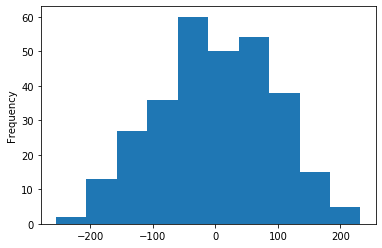

In [45]:
from appearance_bias.feature_extraction import LabelLoader

features_test = FeatureExtractor("{}_aligned".format(test_dir)).get_features()
features_test_aligned = FeatureExtractor("{}_aligned".format(test_dir)).get_features()
labels_test = LabelLoader("{}_aligned".format(test_dir)).get_labels().dropna()
df_test = Regressor.merge_x_y(features_test_aligned, labels_test)
labels_test["Trustworthy"].plot.hist()

In [46]:
# export to TSV for UMAP, TSNE
features = df_test.loc[:, range(2,130)]
meta = df_test.loc[:, "Face name":"Extroverted"]
features.to_csv("output/features/features_random.tsv", sep="\t", header=False)
meta.to_csv("output/features/meta_random.tsv", sep="\t", header=True)

In [47]:
X_test = Regressor.make_X(features_test)
X_test_al = Regressor.make_X(features_test_aligned)
y_test = Interpreter.binarize(labels_test[label], threshold=labels_test[label].mean())
labels_test_aligned = Regressor.merge_x_y(features_test_aligned, labels_test)[label]
y_test_al = Interpreter.binarize(labels_test_aligned, threshold=labels_test_aligned.mean())

In [48]:
clf.score(X_test, y_test)

0.4766666666666667

In [49]:
clf_aligned.score(X_test_al, y_test_al)

0.46

In [50]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.4333333333333334

Feature importance?

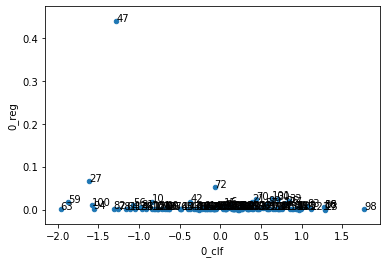

In [52]:
import matplotlib.pyplot as plt

# for random forest
# clf_imp = pd.DataFrame(clf.feature_importances_).sort_values(0, ascending=False)
# for coefs
clf_imp = pd.DataFrame(clf.coef_).transpose().sort_values(0, ascending=False)
imps = clf_imp.join(reg_imp, lsuffix="_clf", rsuffix="_reg")
fig, ax = plt.subplots()
imps.plot("0_clf", "0_reg", kind="scatter", ax=ax)
for k, v in imps.iterrows():
    ax.annotate(k, v)

Observation: the same two embeddings are the most important (10 and 47). Is this true for other labels?

Answer: barely. Not sure that these importances are significant - how can we trace them back to the original images, given that they're embeddings?

Attractive


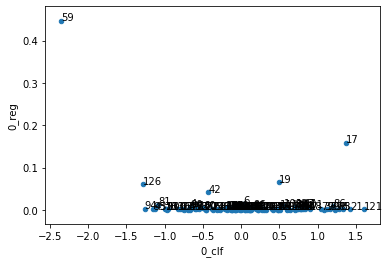

Competent


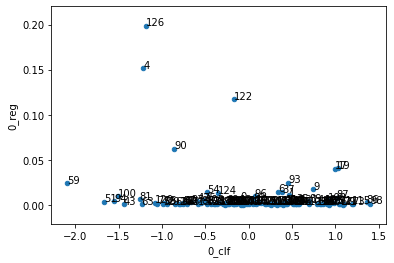

Dominant


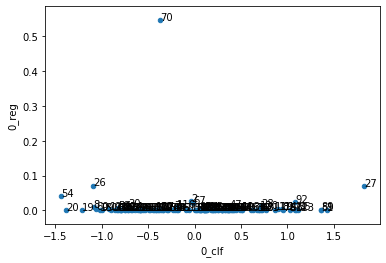

Extroverted


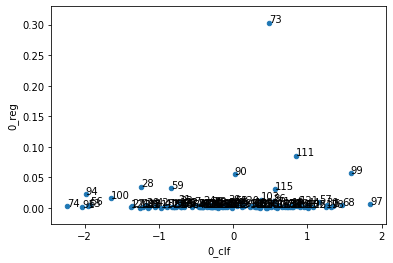

Likeable


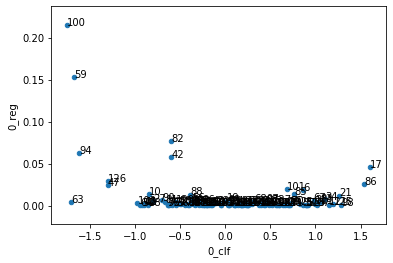

Trustworthy


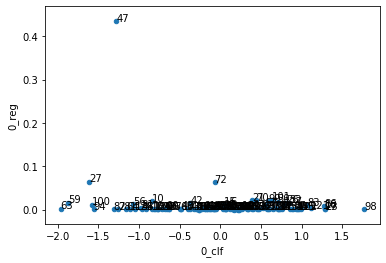

In [53]:
def feature_importance(label):
    reg = Regressor(df, label)
    reg.fit(split=False)
    reg_imp = pd.DataFrame(reg.reg.feature_importances_).sort_values(0, ascending=False)
#     clf = RandomForestClassifier(n_estimators=100)
    clf = LogisticRegression(max_iter=1000)
    X = reg.X
    y = reg.y
    # convert y to binary
    y = (y > 0).astype(int)
    clf.fit(X, y)
    # for random forest
    # clf_imp = pd.DataFrame(clf.feature_importances_).sort_values(0, ascending=False)
    # for coefs
    clf_imp = pd.DataFrame(clf.coef_).transpose().sort_values(0, ascending=False)
    imps = clf_imp.join(reg_imp, lsuffix="_clf", rsuffix="_reg")
    print(label)
    fig, ax = plt.subplots()
    imps.plot("0_clf", "0_reg", kind="scatter", ax=ax)
    for k, v in imps.iterrows():
        ax.annotate(k, v)
    plt.show()
#     return reg_imp, clf_imp
feature_importance("Attractive")
feature_importance("Competent")
feature_importance("Dominant")
feature_importance("Extroverted")
feature_importance("Likeable")
feature_importance("Trustworthy")

### Perturbations

For this section, using an SVC model (best suited, and no need for interpretability like in last section).

In [57]:
from keras.preprocessing import image

interpreter = Interpreter()
interpreter.fit(X_al, y_al)

In [64]:
# a sample image
sample = features_train.sample()
sample_img = interpreter.get_img(*sample[['Face name', 'Source']].values[0], "maxdistinct_aligned", file="png")

(1, 128)


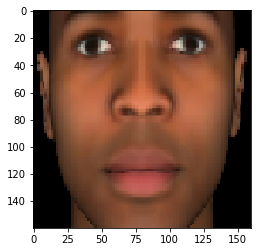

In [65]:
# a sample extraction
from keras.applications.inception_v3 import preprocess_input

img_processed = preprocess_input(image.img_to_array(sample_img)).astype(float)
plt.imshow(img_processed / 2 + 0.5)

# need to load up face net
sample_embedding = interpreter.extraction_model.model.predict(np.array([img_processed]))
print(sample_embedding.shape)

In [66]:
# a sample classification
pred = interpreter.predict_fn(np.array([img_processed]))
pred

array([[0.05666926, 0.94333074]])

/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


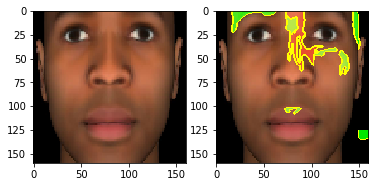

In [67]:
interpreter.explain_img(sample_img, "Trustworthy", num_samples=500)

Now let's try with a variety of images.

# Interpreting 1 images in data/maxdistinct_aligned #
Generating Trustworthy regressor
Extracting training features for data/maxdistinct_aligned...
Extracting labels for data/maxdistinct_aligned...
Fitting interpreter...
Interpreting images...
1/1


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


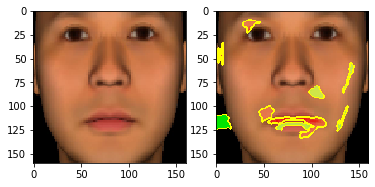

In [68]:
from appearance_bias.api import interpret

interpret('Trustworthy', ['data/maxdistinct_aligned'], 'data/maxdistinct_aligned', n=1, file='png', num_samples=500)

# Interpreting 1 images in data/random_aligned #
Generating Trustworthy regressor
Fitting interpreter...
Interpreting images...
1/1


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


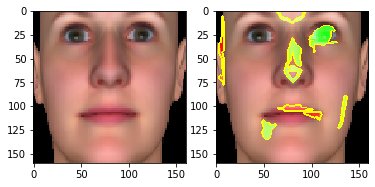

In [69]:
interpret('Trustworthy', ['data/maxdistinct_aligned'], 'data/random_aligned', n=1, file='png', num_samples=500)

**Aligned Todorov Faces**

Do the important features changed when the Todorov faces are cropped and aligned with OpenFace?

In [ ]:
for i in range(3):
    sample = df[df[label].notna()].sample()
    
    print("## WITHOUT ALIGNMENT ##")
    sample_img = interpreter.get_img(*sample[['Face name', 'Source']].values[0], "maxdistinct")
    interpreter.explain_img(sample_img, sample['Face name'].values[0], sample[label].values[0])
    
    print("## WITH ALIGNMENT ##")
    sample_img = interpreterget_img(*sample[['Face name', 'Source']].values[0], "maxdistinct_aligned", file="png")
    interpreter.explain_img(sample_img, sample['Face name'].values[0], sample[label].values[0])

### Test Sets

Let's do feature analysis on our test sets to see if the model considers the same types of features (is it accurately picking out the faces?)

**Races**

# Interpreting 1 images in data/people_all_aligned #
Generating Trustworthy regressor
Fitting interpreter...
Interpreting images...
1/1


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


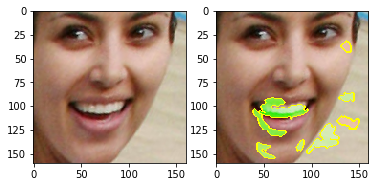

In [82]:
interpret(
    'Trustworthy', 
    ['data/maxdistinct_aligned'], 
    'data/people_all_aligned',
    n=1, 
    file='png',
    ground_truth=False,
    num_samples=500
)

**Politicians**

In [83]:
# classification accuracy
features_pol = FeatureExtractor('data/politicians-database_aligned').get_features()
results = pd.read_csv("data/politicians-database/coding.csv")[["Full Label", "Competency"]]
results.columns = ["Face name", "competency_ground"]
results["competency_norm"] = (results["competency_ground"] - results["competency_ground"].mean()) / results["competency_ground"].std()
results = results.set_index("Face name")
joined = features_pol.join(results, on="Face name").dropna()
X_pol = Regressor.make_X(joined.drop(columns=["competency_ground", "competency_norm"]))
y_pol = joined["competency_norm"]
y_pol_bin = Interpreter.binarize(y_pol)

In [84]:
# 'explained_variance', 'neg_root_mean_squared_error'
from sklearn.metrics import explained_variance_score, mean_squared_error

y_pred = reg_aligned.reg.predict(X_pol)
explained_variance_score(y_pred, y_pol)

-0.0007428821264647834

In [85]:
mean_squared_error(y_pred, y_pol, squared=False)

145.38050367294204

In [86]:
clf.score(X_pol, y_pol_bin)

0.5316455696202531

# Interpreting 1 images in data/politicians-database_aligned #
Generating Competent regressor
Fitting interpreter...
Interpreting images...
1/1


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


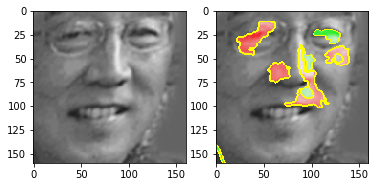

In [88]:
interpret(
    'Competent', 
    ['data/maxdistinct_aligned'], 
    'data/politicians-database_aligned',
    n=1, 
    file='png',
    ground_truth=False,
    num_samples=500
)

**Occupations**

# Interpreting 1 images in data/occupations_aligned #
Generating Trustworthy regressor
Fitting interpreter...
Interpreting images...
1/1


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


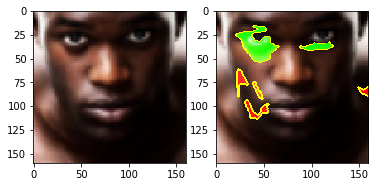

In [98]:
interpret(
    'Trustworthy', 
    ['data/maxdistinct_aligned'], 
    'data/occupations_aligned',
    n=1, 
    file='png',
    ground_truth=False,
    num_samples=500
)

**Average Faces**

# Interpreting 1 images in data/average-faces_aligned #
Generating Trustworthy regressor
Fitting interpreter...
Interpreting images...
1/1


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


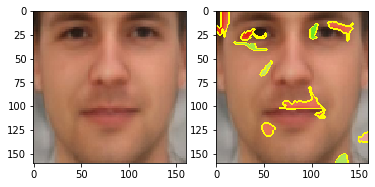

In [100]:
interpret(
    'Trustworthy', 
    ['data/maxdistinct_aligned'], 
    'data/average-faces_aligned',
    n=1,
    file='png',
    ground_truth=False,
    num_samples=500
)

## Error Analysis

### Politician Faces

In [ ]:
errors = pd.read_csv("output/preds/politicians-error.csv", index_col=0, header=0, names=["name", "error", "actual", "pred"])
errors.head(5)

In [ ]:
for outlier in errors.head(5).itertuples():
    print("Error: {}".format(outlier.error))
    print("Actual: {}".format(outlier.actual))
    print("Predicted: {}".format(outlier.pred))
    subdir = "Governors" if outlier.name.startswith("G") else "Senate"
    img = get_img(
        outlier.name, 
        "{}_all_stimuli".format(subdir), 
        "politicians-database_aligned", 
        file="png"
    )
    explain_img(img, name="", ground_truth=outlier.actual)

In [ ]:
for outlier in errors.dropna().tail(5).itertuples():
    print("Error: {}".format(outlier.error))
    print("Actual: {}".format(outlier.actual))
    print("Predicted: {}".format(outlier.pred))
    subdir = "Governors" if outlier.name.startswith("G") else "Senate"
    img = get_img(
        outlier.name, 
        "{}_all_stimuli".format(subdir), 
        "politicians-database_aligned",
        file="png"
    )
    explain_img(img, name="", ground_truth=outlier.actual)

### Random Faces

Attractive


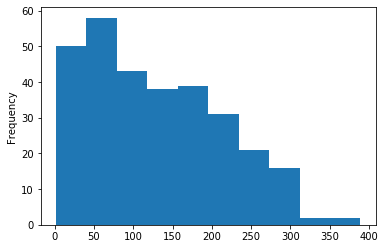

Competent


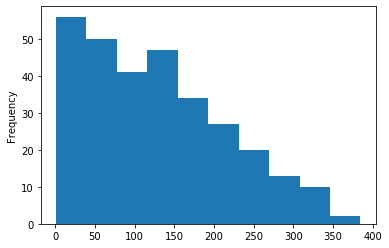

Trustworthy


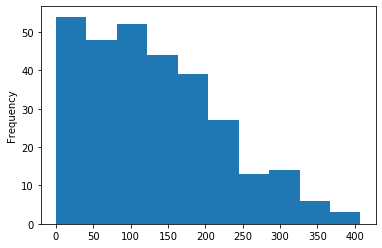

Dominant


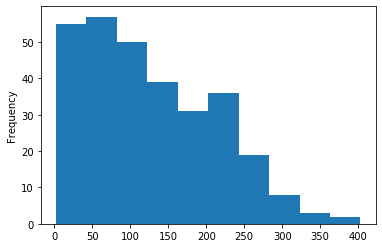

Extroverted


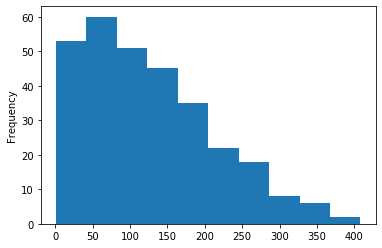

Likeable


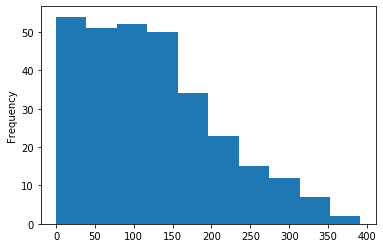

Threatening


ValueError: Wrong number of items passed 2, placement implies 1

In [94]:
for label in LabelLoader.base_labels:
    print(label)
    labels_test = LabelLoader("data/random_aligned").get_labels(normalization=True).dropna()
    errors = Regressor.merge_x_y(features_test_aligned, labels_test[["Face name", label]])[["Face name", label]]
    errors['name'] = errors['Face name']
    errors["actual"] = errors[label]
    errors["pred"] = reg_aligned.predict(Regressor.make_X(features_test_aligned))
    errors["error"] = abs(errors["actual"] - errors["pred"])
    errors = errors.sort_values("error", ascending=False).drop(columns=[label, 'Face name'])
    errors["error"].plot.hist()
    plt.show()

Error: 296.4391541161309
Actual: -194.93915411613088
Predicted: 101.5
Image  w/ ground truth val -194.93915411613088
Explaining label Positive (p=[0.97666963]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


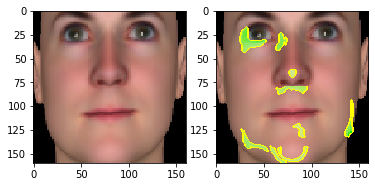

Error: 294.01270575394597
Actual: -180.01270575394597
Predicted: 114.0
Image  w/ ground truth val -180.01270575394597
Explaining label Negative (p=[0.99701611]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


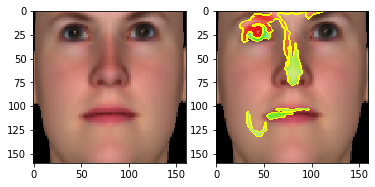

Error: 290.49880856863524
Actual: -184.99880856863524
Predicted: 105.5
Image  w/ ground truth val -184.99880856863524
Explaining label Negative (p=[0.9999999]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


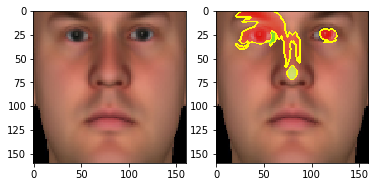

Error: 277.7367670676042
Actual: 163.48676706760418
Predicted: -114.25
Image  w/ ground truth val 163.48676706760418
Explaining label Positive (p=[0.57500992]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


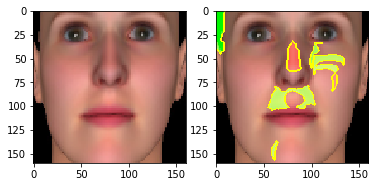

Error: 267.85201026135144
Actual: 133.60201026135147
Predicted: -134.25
Image  w/ ground truth val 133.60201026135147
Explaining label Negative (p=[0.99480699]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


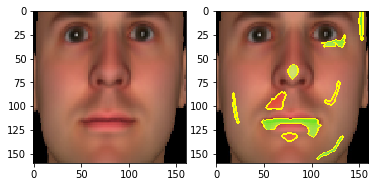

In [119]:
for outlier in errors.head(5).itertuples():
    print("Error: {}".format(outlier.error))
    print("Actual: {}".format(outlier.actual))
    print("Predicted: {}".format(outlier.pred))
    img = get_img(
        outlier.name, 
        "", 
        "random_aligned",
        file="png"
    )
    explain_img(img, name="", ground_truth=outlier.actual)

Error: 1.8871939852042772
Actual: 19.112806014795723
Predicted: 21.0
Image  w/ ground truth val 19.112806014795723
Explaining label Positive (p=[0.99998082]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


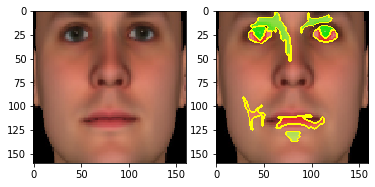

Error: 1.2738064757366558
Actual: -15.726193524263344
Predicted: -17.0
Image  w/ ground truth val -15.726193524263344
Explaining label Positive (p=[0.9956488]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


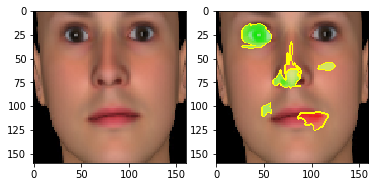

Error: 1.1109503305160615
Actual: -45.61095033051606
Predicted: -44.5
Image  w/ ground truth val -45.61095033051606
Explaining label Positive (p=[0.92477537]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


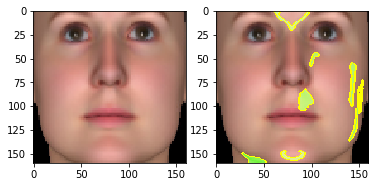

Error: 0.7249477766765295
Actual: -120.27505222332347
Predicted: -121.0
Image  w/ ground truth val -120.27505222332347
Explaining label Negative (p=[0.99999961]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


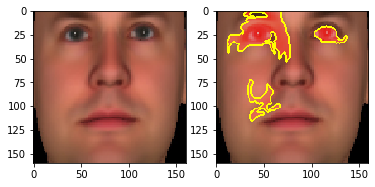

Error: 0.7141520232322787
Actual: -5.785847976767721
Predicted: -6.5
Image  w/ ground truth val -5.785847976767721
Explaining label Positive (p=[0.97180783]) for attribute Likeable


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


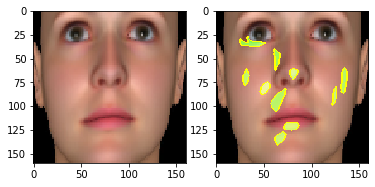

In [120]:
for outlier in errors.tail(5).itertuples():
    print("Error: {}".format(outlier.error))
    print("Actual: {}".format(outlier.actual))
    print("Predicted: {}".format(outlier.pred))
    img = get_img(
        outlier.name, 
        "", 
        "random_aligned",
        file="png"
    )
    explain_img(img, name="", ground_truth=outlier.actual)

## Interactive View of LIME Analysis

### Random Faces

In [101]:
from IPython.display import Image
from ipywidgets import interact, SelectionSlider, Layout
from appearance_bias.api import get_regressor
import os


def format_val(val):
    return "➕" if val else "➖"

def interpret_widget(interpret_dir, label, labels=None):
    reg = get_regressor(label, ["data/maxdistinct_aligned"])
    X = reg.X
    y = reg.y
    reg.fit()

    interpreter = Interpreter()
    interpreter.fit(X, y)

    features = FeatureExtractor(interpret_dir).get_features()
    labels = LabelLoader(interpret_dir).get_labels(normalization=True) if labels is None else labels
    features_interpret = Regressor.merge_x_y(features, labels).dropna(subset=[label])
    features_interpret["pred"] = reg.predict(reg.make_X(features_interpret.drop(columns=labels.columns)))
    features_interpret["pred_bin"] = interpreter.clf.predict(reg.make_X(features_interpret.drop(columns=["pred"]+list(labels.columns))))
    features_interpret["label"] = features_interpret[label]
    features_interpret["label_bin"] = Interpreter.binarize(features_interpret[label])
    features_interpret = features_interpret.sort_values(["pred_bin", "label_bin"])
    
    print("Accuracy: {}".format((features_interpret["pred_bin"] == features_interpret["label_bin"]).sum() / features_interpret.shape[0]))

    widget = SelectionSlider(
        options=list(features_interpret.itertuples(index=False)),
        description='Image: ',
        disabled=False,
        orientation='horizontal',
        readout=True,
        layout=Layout(width='70%')
    )
    
    @interact
    def show_images(face=widget):
        t = face.pred_bin == face.label_bin
        print("{} {} {} - {}".format(
            "✅" if t else "❌", 
            "TRUE" if t else "FALSE", 
            "POSITIVE" if face.pred_bin else "NEGATIVE",
            face._0
        ))
        print("Pred: {}\t(reg: {})".format(
            format_val(face.pred_bin),
            face.pred
        ))
        print("Actual: {}\t(reg: {})".format(
            format_val(face.label_bin),
            face.label
        ))
        display(Image("output/lime/{}/{}.png".format(os.path.basename(interpret_dir), face._0)))

In [102]:
interpret_widget("data/random_aligned", "Trustworthy")

Generating Trustworthy regressor
Accuracy: 0.5533333333333333


interactive(children=(SelectionSlider(description='Image: ', layout=Layout(width='70%'), options=(Pandas(_0='f…

In [103]:
results = pd.read_csv("data/politicians-database/coding.csv")[["Full Label", "Competency"]]
results.columns = ["Face name", "competency_ground"]
results["Competent"] = (results["competency_ground"] - results["competency_ground"].mean()) / results["competency_ground"].std()
results = results.set_index("Face name")

interpret_widget("data/politicians-database_aligned", "Competent", labels=results)

Generating Competent regressor
Accuracy: 0.4810126582278481


interactive(children=(SelectionSlider(description='Image: ', layout=Layout(width='70%'), options=(Pandas(_0='G…